In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

1 - Business Problem
 Extract reviews of any product from ecommerce website like amazon 
 Perform sentimental analysis

2 - Data collection and description
Connecting to Amazom and download reviews¶

In [ ]:
import pandas
df=pd.read_csv("/content/B079JLY5M5 - reviews.csv",error_bad_lines=False)

In [ ]:
df.head(5)

,Title
0,Updated but NOT Better
1,Eh
2,Was great until it stopped working and then Lo...
3,I intentionally purchased this as a 2nd identi...
4,I gave up trying to get it to work with Macboo...


3 Cleaning the text

In [ ]:
df = [Title.strip() for Title in df.Title] # remove both the leading and the trailing characters
df = [Title for Title in df if Title] # removes empty strings, because they are considered in Python as False
df[0:10]

['Updated but NOT Better',
 'Eh',
 'Was great until it stopped working and then Logitech would not honor warranty',
 'I intentionally purchased this as a 2nd identical keyboard/mouse combo',
 'I gave up trying to get it to work with Macbook Pro running Mac OS Catalina',
 'Thank you Amazon Customer Service Rep. Saved me from returning an item for no reason.',
 'Hidden USB',
 'Pure junk.',
 "Junk! Don't buy it - keyboard stops working for long periods of time",
 'Usual Logitech high quality']

In [ ]:
txt_upt = ' '.join(df)

In [ ]:
txt_upt

"Updated but NOT Better Eh Was great until it stopped working and then Logitech would not honor warranty I intentionally purchased this as a 2nd identical keyboard/mouse combo I gave up trying to get it to work with Macbook Pro running Mac OS Catalina Thank you Amazon Customer Service Rep. Saved me from returning an item for no reason. Hidden USB Pure junk. Junk! Don't buy it - keyboard stops working for long periods of time Usual Logitech high quality That the USB Reciever is in the F_ _ _ing battery compartment in the mouse. DON'T WASTE YOUR MONEY Now that isn't quality! Important -USB dongle is not in mouse. It is attached to packaging!!!!!! cheaply made Absolute POS! missing charactrs...sometimes keeps adding characters Well built  inexpensive  syncs to WIN 10 flawlessly but Frustrating POOR (unique) product packaging One thing to look out for if you plan to use with a ComputeStick Convenient  works well Plug n' Play. Quiet. Great tactile feedback Updated but NOT Better Eh Was grea

In [ ]:
txt_upt = re.sub("[^A-Za-z" "]+"," ",txt_upt).lower() #remove special character
txt_upt = re.sub("[0-9" "]+"," ",txt_upt).lower() #remove numbers
txt_upt = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upt).lower() #remove hyperlink

In [ ]:
txt_upt

'updated but not better eh was great until it stopped working and then logitech would not honor warranty i intentionally purchased this as a nd identical keyboard mouse combo i gave up trying to get it to work with macbook pro running mac os catalina thank you amazon customer service rep saved me from returning an item for no reason hidden usb pure junk junk don t buy it keyboard stops working for long periods of time usual logitech high quality that the usb reciever is in the f ing battery compartment in the mouse don t waste your money now that isn t quality important usb dongle is not in mouse it is attached to packaging cheaply made absolute pos missing charactrs sometimes keeps adding characters well built inexpensive syncs to win flawlessly but frustrating poor unique product packaging one thing to look out for if you plan to use with a computestick convenient works well plug n play quiet great tactile feedback updated but not better eh was great until it stopped working and then

In [ ]:
text_tokens = word_tokenize(txt_upt)

In [ ]:
text_tokens

['updated',
 'but',
 'not',
 'better',
 'eh',
 'was',
 'great',
 'until',
 'it',
 'stopped',
 'working',
 'and',
 'then',
 'logitech',
 'would',
 'not',
 'honor',
 'warranty',
 'i',
 'intentionally',
 'purchased',
 'this',
 'as',
 'a',
 'nd',
 'identical',
 'keyboard',
 'mouse',
 'combo',
 'i',
 'gave',
 'up',
 'trying',
 'to',
 'get',
 'it',
 'to',
 'work',
 'with',
 'macbook',
 'pro',
 'running',
 'mac',
 'os',
 'catalina',
 'thank',
 'you',
 'amazon',
 'customer',
 'service',
 'rep',
 'saved',
 'me',
 'from',
 'returning',
 'an',
 'item',
 'for',
 'no',
 'reason',
 'hidden',
 'usb',
 'pure',
 'junk',
 'junk',
 'don',
 't',
 'buy',
 'it',
 'keyboard',
 'stops',
 'working',
 'for',
 'long',
 'periods',
 'of',
 'time',
 'usual',
 'logitech',
 'high',
 'quality',
 'that',
 'the',
 'usb',
 'reciever',
 'is',
 'in',
 'the',
 'f',
 'ing',
 'battery',
 'compartment',
 'in',
 'the',
 'mouse',
 'don',
 't',
 'waste',
 'your',
 'money',
 'now',
 'that',
 'isn',
 't',
 'quality',
 'important',


In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [ ]:
tokens_without_sw

['updated',
 'better',
 'eh',
 'great',
 'stopped',
 'working',
 'logitech',
 'would',
 'honor',
 'warranty',
 'intentionally',
 'purchased',
 'nd',
 'identical',
 'keyboard',
 'mouse',
 'combo',
 'gave',
 'trying',
 'get',
 'work',
 'macbook',
 'pro',
 'running',
 'mac',
 'catalina',
 'thank',
 'amazon',
 'customer',
 'service',
 'rep',
 'saved',
 'returning',
 'item',
 'reason',
 'hidden',
 'usb',
 'pure',
 'junk',
 'junk',
 'buy',
 'keyboard',
 'stops',
 'working',
 'long',
 'periods',
 'time',
 'usual',
 'logitech',
 'high',
 'quality',
 'usb',
 'reciever',
 'f',
 'ing',
 'battery',
 'compartment',
 'mouse',
 'waste',
 'money',
 'quality',
 'important',
 'usb',
 'dongle',
 'mouse',
 'attached',
 'packaging',
 'cheaply',
 'made',
 'absolute',
 'pos',
 'missing',
 'charactrs',
 'sometimes',
 'keeps',
 'adding',
 'characters',
 'well',
 'built',
 'inexpensive',
 'syncs',
 'win',
 'flawlessly',
 'frustrating',
 'poor',
 'unique',
 'product',
 'packaging',
 'thing',
 'look',
 'plan',
 '


4 Create the DF

In [ ]:
tf = TfidfVectorizer()

In [ ]:
text_tf = tf.fit_transform(tokens_without_sw)

In [ ]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df

,absolute,actually,adding,affordable,amazon,attached,awesome,awful,bar,bargain,basically,batteries,battery,believe,beside,best,better,biggest,bluetooth,bought,box,brand,built,buy,came,caps,casual,catalina,characters,charactrs,cheap,cheaply,clear,combination,combo,combos,comes,comfortable,compact,compartment,...,sometimes,space,spotty,steer,still,stopped,stops,syncs,tactile,thank,thing,time,transmitter,tried,trying,two,unique,update,updated,usb,use,useful,users,usual,value,via,warranty,waste,weeks,well,win,windows,wireless,wires,wonderful,work,working,works,worst,would
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_list = ' '.join(df)

In [ ]:
word_list

'absolute actually adding affordable amazon attached awesome awful bar bargain basically batteries battery believe beside best better biggest bluetooth bought box brand built buy came caps casual catalina characters charactrs cheap cheaply clear combination combo combos comes comfortable compact compartment completely computering computestick connection convenient could customer deal decent desk disappointed disappointing disappointment disconnecting dongle easier easy eh engineering ever every excellent expected faulty features feedback flawlessly forget frustrating functional gaming garbage gave get god good got great greqt hidden high home honor horrible identical important indicator inexpensive ing instructions intentionally issues item junk kb keeper keeps keyboard keyboards keys lag lagging laying led life light lightweight like little lock logitec logitech long look looks loses low mac macbook made make minute missing mk money months mouse much nd needed nice occasional ok okay 

In [ ]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

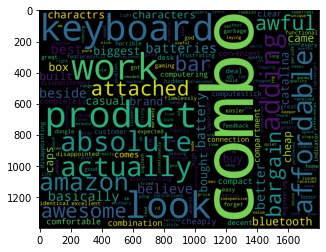

In [ ]:
plt.imshow(wordcloud)

sentimental analysis


In [ ]:
with open("/content/positive-words (1).txt","r") as pw:
    positive_words = pw.read().split("\n")

In [ ]:
positive_words = positive_words[35:]

In [ ]:
with open("/content/negative-words (1).txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [ ]:
negative_words = negative_words[35:]

In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [ ]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

CONCLUSION


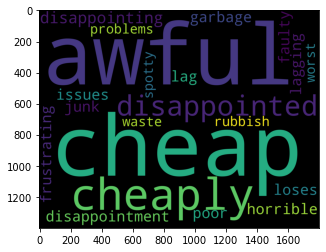

In [ ]:
plt.imshow(wordcloud_neg)

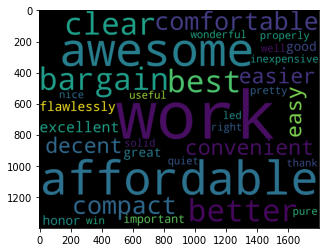

In [ ]:
plt.imshow(wordcloud_pos)